# 4 다양한 분류 알고리즘

## 4-1 Logistic Regression이라 부르고 분류 알고리즘이라 쓴다

분류 모델은 예측뿐만 아니라, 예측의 근거가 되는 확률도 출력할 수 있음

k-Neighbors는 이웃한 샘플의 클래스 비율만 출력되므로 Same Input, Same Output

로지스틱 회귀를 활용하면 선형방정식을 활용해서 계산한 값을 0~1 사이로 압축하여 0~100% 사이의 확률로 이해한다

-> 이진 분류에서는 시그모이드 함수에 통과시켜서 확률 양성/음성 표현

-> 다중 분류에서는 클래스 개수만큼 방정식 훈련, 소프트맥스 함수 통과시켜서 sum of all class = 1로 만든다.

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# unique value of species
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 데이터 중 5개의 열을 input data로 만들기
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# Species는 맞춰야하는 값이니까 target으로
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
# 훈련 세트 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# k-neighbors로 확률 예측
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
# 과대적합, 과소적합 평가
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀

선형회귀와 동일하게 선형방정식 학습, 하지만 계수가 0~1이 되어야 하는데

- 이를 **sigmoid function(logistic funtion)**이 도와줌

In [ ]:
# 이진 분류 수행하기

# Boolean Indexing

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, True]])

['A' 'C' 'E']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 다중 분류

# LogisticRegression에서 C는 하이퍼파라미터 (L2 규제, 즉 제곱 계수를 규제하기 위한 하이퍼파라미터)이고
# 작을 수록 규제 강도는 커진다
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


### 다중분류와 소프트맥스 함수

특성이 5개이므로, coef_의 열의 갯수는 5개가 맞음
근데 왜 7행인거지?

#### 소프트 맥스는 클래스마다 z값을 계산한다

가장 높은 z 값을 출력하는 클래스가 예측 클래스가 되는것이고

z 값은 z 값을 전부 exponential 함수에 넣고 (e^z1, e^z2, ... , e^z7)

다 더한 값을 정의 (e_sum)

각각의 확률은 e^i / e_sum으로 정의한다.

그러면 모든 클래스에서의 확률을 더했을 때 e_sum/e_sum = 1

## 4-2 확률적 경사 하강법

기존 훈련 데이터에 새로운 데이터를 추가되는 경우

- 매일 추가되는 새로운 데이터를 활용해서 모델을 훈련한다
  - 지속 가능한 방식은 아님(매일마다 늘어가는 새로운 데이터들을 다...?)

- 새로운 데이터를 추가할 때 이전 데이터를 버림
  - 버린 데이터에 중요한 데이터가 있다면?

-> 이전에 훈련된 모델을 버리고 새로운 모델을 훈련한다 (X)

-> 새로운 데이터에 대해서 조금씩 더 훈련한다.

이를 점진적(온라인, 정확히는 온라인은 서비스를 진행하면서 업데이트 하는 것) 학습이라 부른다.

대표적인 알고리즘

- 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

### 확률적 경사하강법

- 경사하강법
  - 극값을 찾아나가기 위한 여정

- 확률적
  - 전체 샘플을 사용하지 않고 **전체 샘플 중 랜덤한 일부**를 활용하여 극값을 찾아낸다!

#### 에포크

SGD에서 훈련 세트를 한 번 모두 사용하는 과정

#### 확률적 경사하강법과 신경망 알고리즘

신경망을 구축할 때 많은 데이터를 사용하기에 **확률적 경사 하강법(데이터 하나를 추출)** 혹은 **미니배치 경사 하강법(데이터 일부를 추출)**을 활용한다.

### 손실함수(loss function, 비용 함수(cost function))

어떤 문제에서 알고리즘의 오차를 측정하는 기준

여기서 이진 분류를 사용할 때에는 로지스틱 손실함수(이진 크로스엔트로피 손실함수)를,
다중 분류를 사용할 때에는 크로스엔트로피 손실함수를 활용한다.




### SGDClassifier

In [1]:
import pandas as pd

In [3]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier

In [13]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [14]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 과대적합과 과소적합

- 에포크가 적으면
  - 과소적합이 일어날 수 있음
- 에포크가 많으면
  - 과대적합 가능성 올라감

과대적합이 시작하기 전에 훈련을 멈추는 것은 **조기종료**라고 한다.

In [18]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [19]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

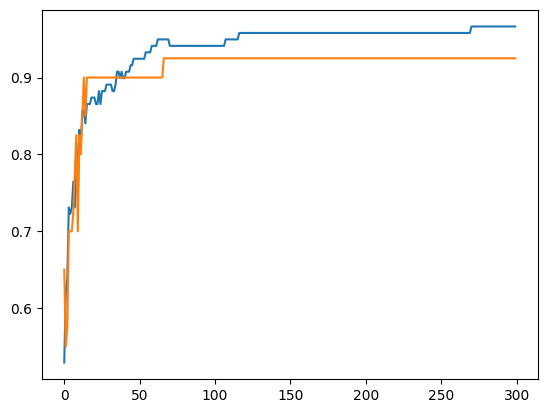

In [20]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [21]:
# tol => iter 동안 성능 향상될 최솟값
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


### 확률적 경사 하강법을 활용한 회귀 모델

SGDRegressor가 확률적 경사 하강법을 활용한 회귀 알고리즘

### loss 매개변수 고찰

loss 매개 변수의 기본 값은 `hinge`이다. `hinge`는 SVM(Support Vector Machine)이라 불리우는 손실함수

